# Bayes4MADMAX

### Start here!

This demo notebook shows you how to initialize a new dataset and store raw simulated data in it.

First let us load the package `Bayes4MADMAX` for the first time. This may take up to a minute!

In [1]:
using Revise

In [2]:
push!(LOAD_PATH, normpath(@__DIR__, "..", "src"))
using Bayes4MADMAX

We now want to initialize a new dataset. This function creates all necessary folders within the file structure. If the folder `dataset` already exists, this will error. Don't worry about it!

**Important:** `dataset` needs to consist of two parts: "simulated" or "measured" and the actual name of the new run. This is to have a clear distinction between what is measurements and what is not and not to clutter the (more important) measurement datasets.

In [4]:
dataset = "simulated/tests2" # probably only true on UNIX?
initialize_dataset(dataset)

Base.IOError: IOError: mkdir("/home/th347/diehl/Documents/2103-Bayes/data/simulated/tests2"; mode=0o777): file already exists (EEXIST)

Set up a set of simulated data.

* `gaussian_noise()` initializes thermal (/white) noise over a certain frequency range with a std given by `scale`.
* `Experiment` and `Theory` are structs, who encompass all of the important physical parameters.

The following two functions add optional components. Try turning them off and see what happens!
* `add_artificial_background!()` adds a more or less arbitrary function to the thermal noise, supposed to resemble the background (i.e. correlated reciever/ LNA noise).
* `add_axion!()` adds an axion specified by `signal`. 

In [2]:
data = gaussian_noise(4e6,9e6,2e3, scale=1e-27)
ex = Experiment(Be=10.0, A=1.0, β=5.0e4, t_int=100.0, Δω=Δω(data), f_ref=11.0e9)

# optional
signal = Theory(
    ma=45.513, 
    rhoa=0.3,
    EoverN=0.6,
    σ_v=218.0,
    vlab=242.1
)

# optional
add_artificial_background!(data)
add_axion!(data, signal, ex)


,freq,pow,noise,background,axion
,Float64,Float64,Float64,Float64,Float64
1,4.0e6,1.20216e-21,-2.76422e-27,1.20216e-21,0.0
2,4.002e6,1.25422e-21,8.19855e-29,1.25422e-21,0.0
3,4.004e6,1.30609e-21,4.69196e-28,1.30609e-21,0.0
4,4.006e6,1.35777e-21,3.2023e-28,1.35777e-21,0.0
5,4.008e6,1.40926e-21,4.42695e-28,1.40926e-21,0.0
6,4.01e6,1.46056e-21,-8.24798e-28,1.46056e-21,0.0
7,4.012e6,1.51167e-21,1.11524e-27,1.51166e-21,0.0
8,4.014e6,1.56258e-21,-1.5032e-28,1.56258e-21,0.0
9,4.016e6,1.6133e-21,-5.82346e-29,1.6133e-21,0.0


Visualize the data!

`plot_data()` plots one column of the data DataFrame (specified by `key`) against frequency:

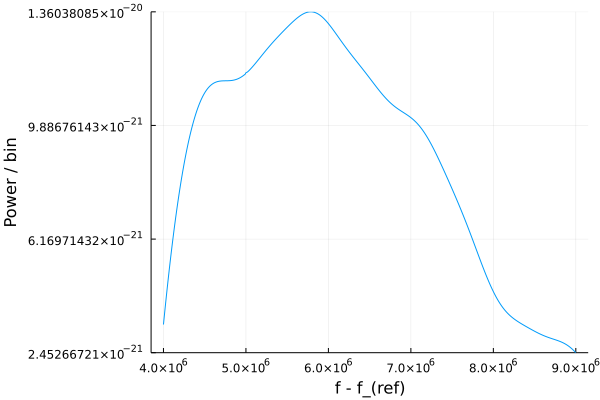

In [9]:
plot_data(data; key=:pow)

Save the newly created data under "test.h5" within the dataset as well as some metadata (`ex` and `signal`). If you did not put an axion into your dataset, just leave out the corresponding argument.

In [5]:
save_data(data, ex, signal, "test", dataset; overwrite=true)

Writing to /home/th347/diehl/Documents/2103-Bayes/data/simulated/tests2/raw_data/test.h5


┌ Warning: The folder you want to write to already exists (/home/th347/diehl/Documents/2103-Bayes/data/simulated/tests2/raw_data/). If it contains data with name test, the data may have been written over, if you are using the overwrite=true option.
└ @ Bayes4MADMAX /home/th347/diehl/Documents/2103-Bayes/src/generate_data.jl:161
